## Problem 1: Set up Github and clone assignment repo. 

In [9]:
#yo yo yo whatsup fam


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

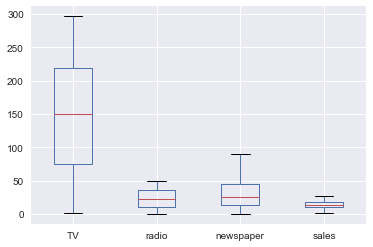

In [3]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [4]:
df.head()
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


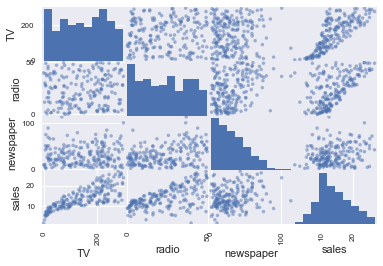

In [5]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix 


#Source='http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
#variables=['TV','radio','newspaper','sales']

#lists=pd.read_csv(Source)

#scatter_matrix(lists[variables], alpha=0.2)
scatter_matrix(df)

plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

In [15]:
"""TV and sales seem most positively correlated with each other, because the data points are close together 
and following a general (somewhat linear) pattern from bottom left to top right. 
Radio and sales seem more weakly positively correlated with each other because the data points are less close but 
still heading in the positive direction upwards. Newspaper and sales, newspaper and TV, radio and TV, and radio and newspaper, 
seem to have no correlation because the data points are dispursed evenly in no general direction/pattern.
"""


'TV and sales seem most positively correlated with each other, because the data points are close together \nand following a general (somewhat linear) pattern from bottom left to top right. \nRadio and sales seem more weakly positively correlated with each other because the data points are less close but \nstill heading in the positive direction upwards. Newspaper and sales, newspaper and TV, radio and TV, and radio and newspaper, \nseem to have no correlation because the data points are dispursed evenly in no general direction/pattern.\n'

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [79]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [6]:
y=df['sales']

b) Set X to be just the features described above in df

In [7]:
X = df.drop(['sales'], axis=1) #tv, newspaper, radio

c) Randomly split data into training and testing - 80% training, 20% testing.

In [8]:
size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.2):]
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.2):]


d) Train model on training data, and make predictions on testing data

In [9]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
regr = LinearRegression(normalize=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#coefficients
print('Coefficients: \n', regr.coef_)
#mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
#variance
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Mean squared error: 2.75
Variance score: 0.90


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [11]:
#coefficients
print('Coefficients: \n', regr.coef_)

#mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))

#variance score: 1 is perfect prediction
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.75
R^2 Score: 0.90


In [23]:
"""This is good because R^2 value is 0.90. The closer the R^2 value is to 1, the closer it is to almost being a perfect 
prediction, and the more likely the predictor x accounts for all of the variation in y. It would be a bit skeptical if it was
greater than 0.90, however, because that means it is too accurate in its prediction or it is almost becoming a causation 
instead of a correlation relationship.
In other words, since R^2=0.90, then 90% of the variation is accounted for in our model.
"""

'This is good because R^2 value is 0.90. The closer the R^2 value is to 1, the closer it is to almost being a perfect \nprediction, and the more likely the predictor x accounts for all of the variation in y. It would be a bit skeptical if it was\ngreater than 0.90, however, because that means it is too accurate in its prediction or it is almost becoming a causation \ninstead of a correlation relationship.\nIn other words, since R^2=0.90, then 90% of the variation is accounted for in our model.\n'

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

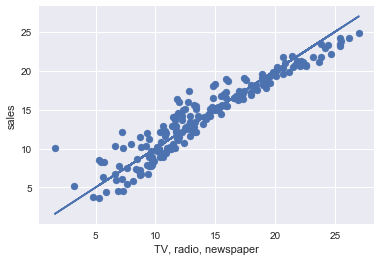

In [12]:
plt.scatter(y,regr.predict(X))
plt.plot(y_test,y_test)
plt.xlabel('TV, radio, newspaper')
plt.ylabel('sales')


In [140]:
"""Yes this looks like a good model for predicting sales because the data points are scattered closely in a positively linear 
direction. Furthermore, the R^2 value is 0.90, which means that TV, newspaper, and radio are strongly and positively 
correlated with sales.The closer the R^2 value is to 1, the more the data points fall perfectly on the regression line, 
meaning that the more likely the predictor x accounts for all of the variation in y. 
In other words, since R^2=0.90, then 90% of the variation is accounted for in our model.
"""

'Yes this looks like a good model for predicting sales because the data points are scattered closely in a positively linear direction. \nFurthermore, the R^2 value is 0.90, which means that TV, newspaper, and radio are strongly and positively correlated with sales.\nThe closer the R^2 value is to 1, the more the data points fall perfectly on the regression line, meaning that the more likely the predictor x\naccounts for all of the variation in y. In other words, since R^2=0.90, then 90% of the variation is accounted for in our model.\n'

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [13]:
#Yes, by looking at the coefficients
# We should make sure that that 
from sklearn import preprocessing
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)


In [14]:
regr = LinearRegression()

regr.fit(X_train, y_train)

#coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))


Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.75
Variance score: 0.90


In [15]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[idx]))

The coefficient for TV is 0.047252095373716226
The coefficient for radio is 0.1799220001771623
The coefficient for newspaper is -0.0009440773964715342


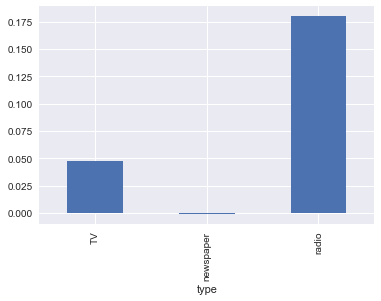

In [16]:
regr.coef_
df = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':regr.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

In [17]:
"""Without normalizing, it seems that radio is the greatest influence on sales and is the strongest impact"""

'Without normalizing, it seems that radio is the greatest influence on sales and is the strongest impact'

In [18]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [19]:
# normalize
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm

,TV,radio,newspaper,sales
1,0.280884,0.293065,0.339894,0.318012
2,-0.346779,0.323306,0.127933,-0.142618
3,-0.439102,0.456371,0.340774,-0.185925
4,0.015074,0.363629,0.245787,0.176280
5,0.114161,-0.251290,0.244908,-0.044193
6,-0.467847,0.516855,0.390906,-0.268602
7,-0.302815,0.192258,-0.062040,-0.087500
8,-0.090776,-0.073871,-0.166702,-0.032382
9,-0.468186,-0.426694,-0.259930,-0.363091
10,0.178416,-0.416613,-0.082269,-0.134744


In [20]:
df_norm.mean()

TV           4.052314e-17
radio       -4.865552e-16
newspaper    4.538037e-17
sales       -1.030426e-16
dtype: float64

In [21]:
y=df_norm['sales']
X = df_norm.drop(['sales'], axis=1)

size = float(len(X))
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.2):]
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.2):]

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#coefficients
print('Coefficients: \n', regr.coef_)
#mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
#variance
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 0.55009624  0.35134375 -0.00422605]
Mean squared error: 0.00
Variance score: 0.90


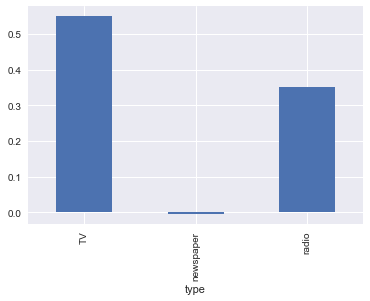

In [22]:
regr.coef_
df = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':regr.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

In [ ]:
"""I can conclude that TV advertisement has the greatest influence on sales"""

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


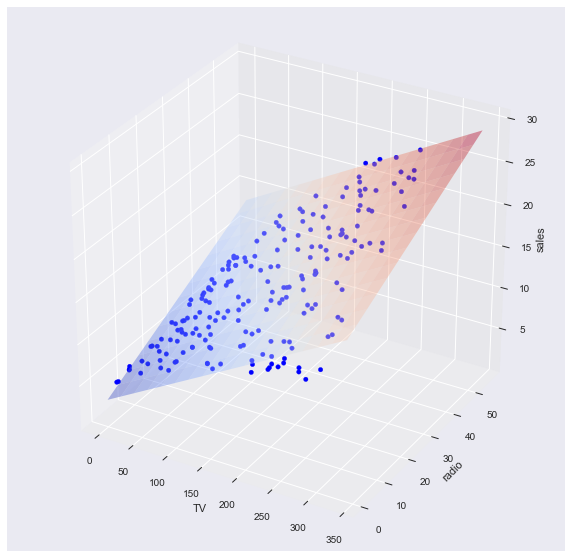

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm
#hyperplane
df2 = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='sales ~ TV + radio', data = df2)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4,cmap=cm.coolwarm)

ax.scatter(df2['TV'], df2['radio'], df2['sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


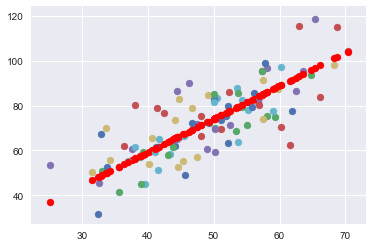

In [85]:
from numpy import *
    # The learning rate defines how fast our model learns (converges).
    # y = mx + b
    # m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(x):
    points = genfromtxt("/Users/Alice Cheng/Documents/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = .0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = x
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

if __name__ == '__main__':
    run(100)

    

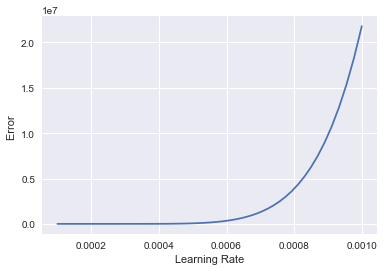

In [45]:
points = genfromtxt("/Users/Alice Cheng/Documents/APMAE4990-/data/data.csv", delimiter=",")

initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 3
#print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
#print "Running..."
errors=[]
learning_rates = np.logspace(-4,-3,100)

for l in learning_rates:
    learning_rate = l
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors.append(compute_error_for_line_given_points(b, m, points))

plt.xlabel('Learning Rate')
plt.ylabel('Error ')

plt.plot(learning_rates,errors,label='num_iterations='+str(num_iterations))


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


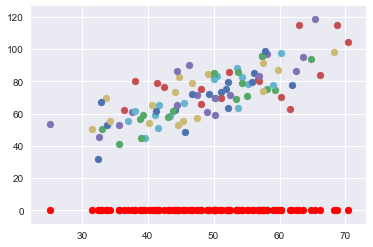

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


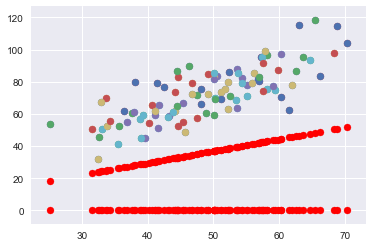

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


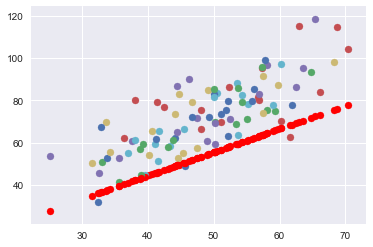

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


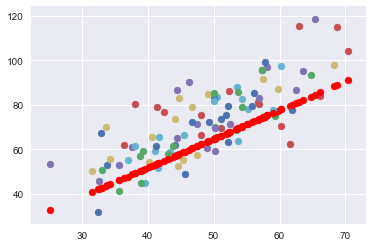

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


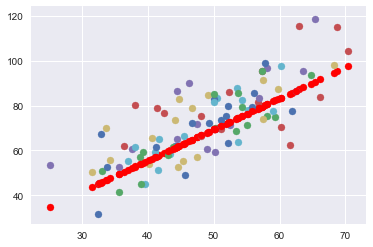

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


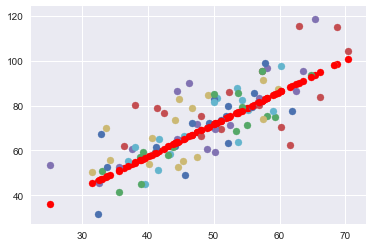

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


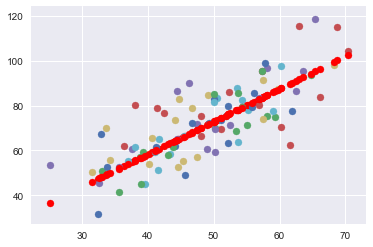

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


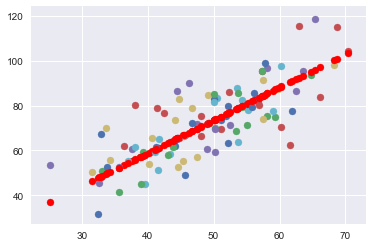

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


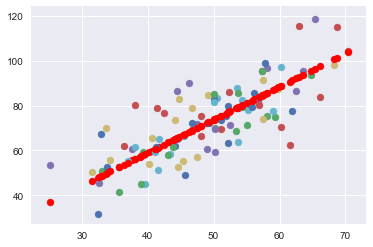

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


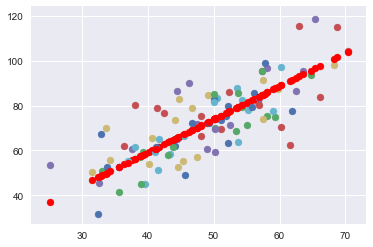

In [86]:
# Use this to visually discuss convergence rate based on learning rate

for x in range(0,10):
    run(x)
    plt.show(x)


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


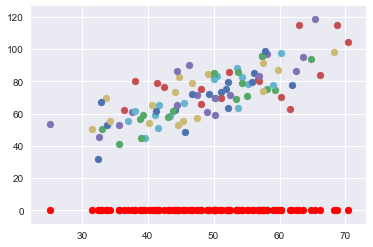

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 14547.010110737296, m = 737070.2973591052, error = 1354315675610631.0


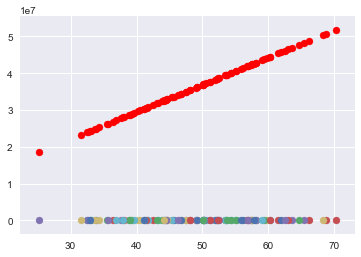

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -7220028167.85796, m = -367343666226.1004, error = 3.363934631241988e+26


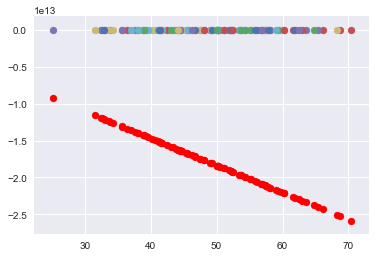

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 3598344114587654.0, m = 1.8307809190267066e+17, error = 8.355552850090712e+37


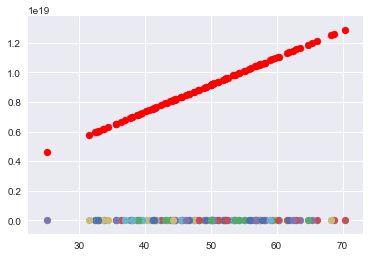

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -1.7933560179791422e+21, m = -9.124313501395666e+22, error = 2.0754048780336344e+49


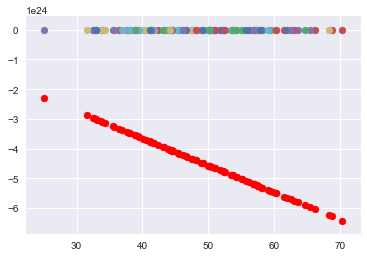

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 8.937793898548683e+26, m = 4.54740903220746e+28, error = 5.1550214390889085e+60


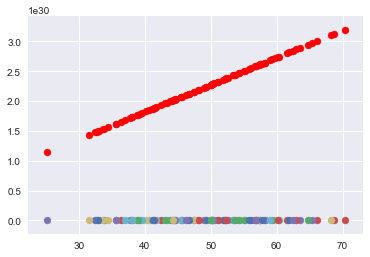

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -4.454450704269652e+32, m = -2.2663544937423427e+34, error = 1.2804367147216291e+72


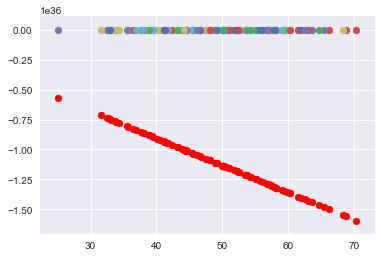

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 2.2200255792416923e+38, m = 1.1295141156045848e+40, error = 3.180429411942241e+83


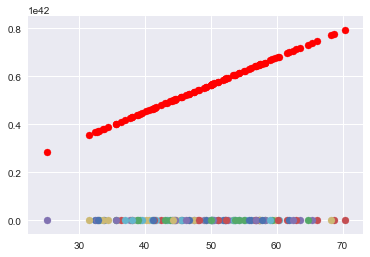

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1.1064245402386786e+44, m = -5.629314129244296e+45, error = 7.89975102092127e+94


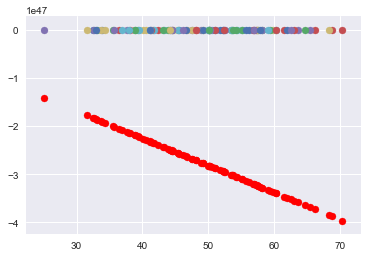

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 5.514239451513535e+49, m = 2.8055583483122303e+51, error = 1.9621899469995245e+106


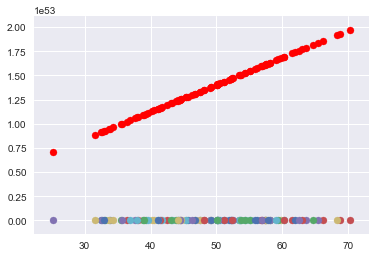

In [87]:
#Learning rate=100
from numpy import *
    # The learning rate defines how fast our model learns (converges).
    # y = mx + b
    # m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(x):
    points = genfromtxt("/Users/Alice Cheng/Documents/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = 100
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = x
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

for x in range(0,10):
    run(x)
    plt.show()